## Importing libraries

In [19]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

### Converting 2 separated excel datasets to one csv dataset

In [20]:
df1 = pd.read_excel ("data.xlsx", 0)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [22]:
df2 = pd.read_excel ("data.xlsx", 1)

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [24]:
df = pd.concat([df1, df2])
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [25]:
df.to_csv("combined_data.csv")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [27]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


Features "Quantity" and "Price" have negative values and they shouldn't have (they probably have it due to cancelled orders or as it says, adjusting bad debts), so will do preprocessing data on that as well.

# 

## Preprocessing data

### Removing negative values

In [28]:
df[df["Price"]<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [29]:
df[df["Quantity"]<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [30]:
df = df[df['Quantity'] >= 0]

df = df[df['Price'] >= 0]

In [31]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.044416e+06,1044416,1.044416e+06,805620.000000
mean,1.117616e+01,2011-01-03 13:08:39.826601984,4.066322e+00,15331.856250
min,1.000000e+00,2009-12-01 07:45:00,0.000000e+00,12346.000000
25%,1.000000e+00,2010-07-11 14:19:00,1.250000e+00,13982.000000
50%,3.000000e+00,2010-12-07 15:32:00,2.100000e+00,15271.000000
75%,1.000000e+01,2011-07-24 11:25:00,4.130000e+00,16805.000000
max,8.099500e+04,2011-12-09 12:50:00,2.511109e+04,18287.000000
std,1.294564e+02,NaN,5.138175e+01,1696.768395


### Data cleaning

In [32]:
nan_count = df.isna().sum()
nan_count

Invoice             0
StockCode           0
Description      1693
Quantity            0
InvoiceDate         0
Price               0
Customer ID    238796
Country             0
dtype: int64

In [33]:
nan_percentage = (df.isna().sum() / len(df)) * 100
nan_percentage

Invoice         0.000000
StockCode       0.000000
Description     0.162100
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.864069
Country         0.000000
dtype: float64

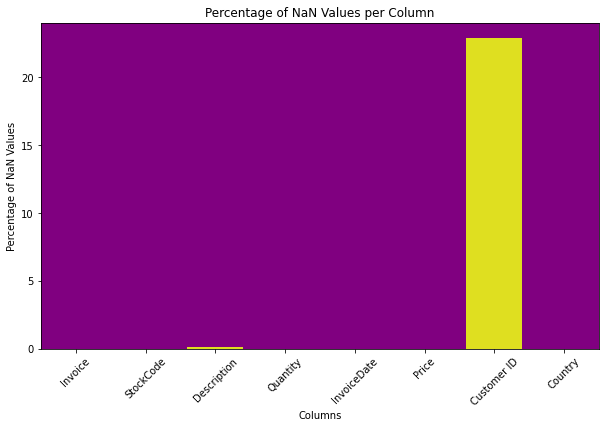

In [34]:
plt.figure(figsize=(10, 6))
nan_plot = sns.barplot(x=nan_percentage.index, y=nan_percentage, color='yellow')

plt.title("Percentage of NaN Values per Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of NaN Values")
plt.xticks(rotation=45)
nan_plot.set_facecolor('purple')  

plt.show()

Even though, percentage of NaN values is really high for Customer ID feature - 22.86% (238796), I will remove all the NaN values as that column will be dropped in feature selection part, since it doesn't bring any relevant information for the rest of the assignment.

In [35]:
df = df.dropna()

In [36]:
nan_count = df.isna().sum()
nan_count

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

### Removing duplicates

In [37]:
duplicated_count = df.duplicated().sum()
duplicated_count

26125

In [38]:
df = df.drop_duplicates()

In [39]:
duplicated_count = df.duplicated().sum()
duplicated_count

0

# 

## Feature selection

I won't use same features for Clustering and MBA. For K-Means clustering, I will seelect features that are related to timeframe, to which products were sold in specific period of time and I will use - "StockCode", "InvoiceDate" and "Quantity". For DBSCAN clustering I will be using "Price" and "Quantity", to identify customer segments based on their purchasing behavior, to check if there are clusters of high-value, low-value, or bulk-buying customers and reveal how different customers respond to pricing strategies. At the end, for the MBA, I will use the "Description" column as it's essential for understanding what each item is and "Invoice" feature, to group items by transaction, which is necessary for market basket analysis. This approach aligns with the specific goals and requirements of the assignment and should give me frequent itemsets, which represent products that are often bought together. As I had issues with memory and code crashing, I will reduce my dataset only to data from EIRE, to be able to perform tasks.

In [40]:
unique_countries = df['Country'].unique()
unique_countries

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Denmark', 'Netherlands', 'Poland',
       'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland', 'Lebanon',
       'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

In [41]:
df = df[df['Country'] == 'EIRE']

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15567 entries, 440 to 539155
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      15567 non-null  object        
 1   StockCode    15567 non-null  object        
 2   Description  15567 non-null  object        
 3   Quantity     15567 non-null  int64         
 4   InvoiceDate  15567 non-null  datetime64[ns]
 5   Price        15567 non-null  float64       
 6   Customer ID  15567 non-null  float64       
 7   Country      15567 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.1+ MB


## Clustering

### Data Preprocessing

In [43]:
columns_to_remove = ['Invoice', 'Description', 'Price', 'Customer ID', 'Country']
df_clustering1 = df.drop(columns=columns_to_remove)

In [44]:
df_clustering1['Month'] = df_clustering1['InvoiceDate'].dt.to_period('M')

In [45]:
df_clustering1 = df_clustering1.groupby(['StockCode', 'Month'])['Quantity'].sum().reset_index()

### One-Hot Encoding

In [46]:
df_clustering1 = pd.get_dummies(df_clustering1, columns=['StockCode'], drop_first=True)

In [47]:
df_clustering1

,Month,Quantity,StockCode_10125,StockCode_10133,StockCode_10134,StockCode_10135,StockCode_11001,StockCode_15034,StockCode_15036,StockCode_16011,...,StockCode_90210B,StockCode_90210D,StockCode_90211A,StockCode_90211B,StockCode_90212B,StockCode_90212C,StockCode_ADJUST,StockCode_BANK CHARGES,StockCode_C2,StockCode_M
0,2010-02,12,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2010-06,12,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2010-09,12,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2010-10,12,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2010-12,12,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10800,2010-05,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10801,2010-06,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10802,2010-09,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10803,2010-10,5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


### Elbow Method

In [48]:
k_range = range(2, 11)
sse = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_clustering1.drop(['Month'], axis=1))
    sse.append(kmeans.inertia_)

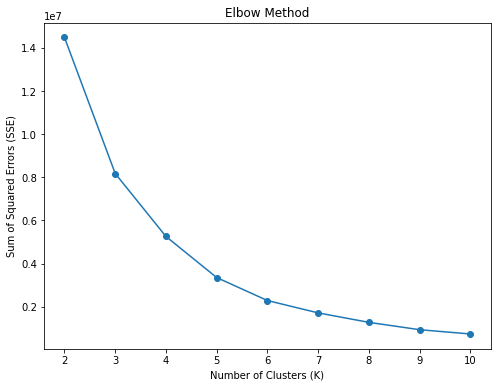

In [49]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

### Silhouette Method

There was an issue with converting the 'Month' column once I started doing Silhouette method, as it is in the Period format, and need to move it to a float for the K-Means clustering.

To resolve this, I used the month's numeric representation instead of the 'Period' format for clustering. 

In [50]:
df_clustering1['NumericMonth'] = df_clustering1['Month'].dt.month

df_clustering1.drop('Month', axis=1, inplace=True)

In [51]:
silhouette_scores = []

k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(df_clustering1)
    silhouette_avg = silhouette_score(df_clustering1, cluster_labels)
    silhouette_scores.append(silhouette_avg)

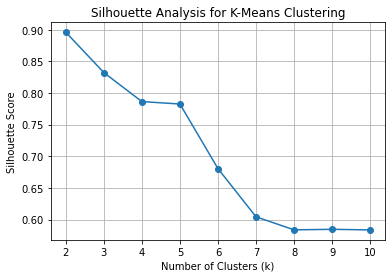

In [52]:
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.grid(True)
plt.show()

### K-Means

In [53]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [54]:
cluster_labels = kmeans.fit_predict(df_clustering1)

In [55]:
df_clustering1['Cluster'] = cluster_labels

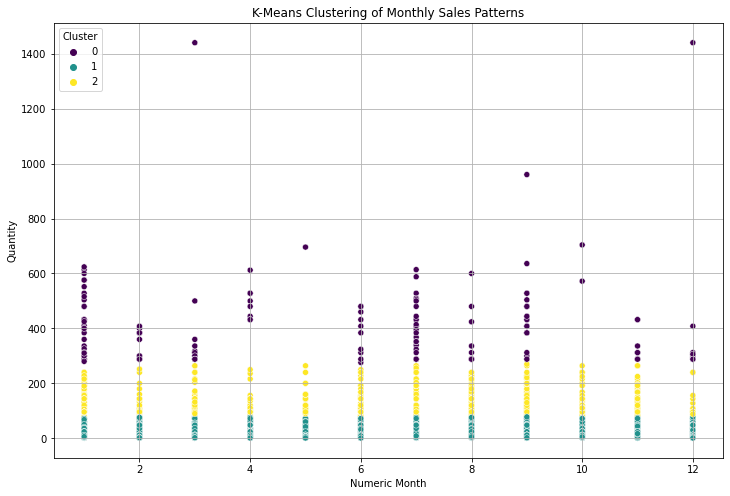

In [56]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clustering1, x='NumericMonth', y='Quantity', hue='Cluster', palette='viridis', legend='full')

plt.title('K-Means Clustering of Monthly Sales Patterns')
plt.xlabel('Numeric Month')
plt.ylabel('Quantity')

plt.legend(title='Cluster')
plt.grid(True)
plt.show()

This plot represents sales of items based on months. As we can see from plot, January and July have probably higher quantity of sales. Also, most of the months have grouped clusters, which means there is a pattern in sales. Only April has a slitghly different patern, which shows that customers are either buying low quantity or higher one. In numbers for April, there are either up to 200 items bought or more than 400, there is no in between. March and December are months with unusual sale patterns, with anomalies. That means that those are the months which have sales with more that 1400 items. 

In [57]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [58]:
cluster_labels = kmeans.fit_predict(df_clustering1)

In [59]:
df_clustering1['Cluster'] = cluster_labels

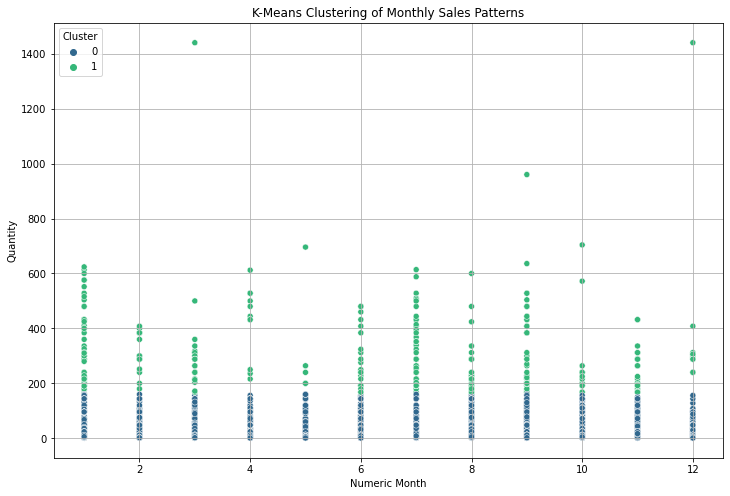

In [60]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clustering1, x='NumericMonth', y='Quantity', hue='Cluster', palette='viridis', legend='full')

plt.title('K-Means Clustering of Monthly Sales Patterns')
plt.xlabel('Numeric Month')
plt.ylabel('Quantity')

plt.legend(title='Cluster')
plt.grid(True)
plt.show()

As Elbow Method and Silhouette were showing different suggestions (3 and 2 respectively), I decided to check both. When it comes to results, it seems that I'm getting pretty much the same results with both number of clusters. Maybe features I've chosen for clustering are may not capture the underlying patterns well, but also, maybe distribution of my data points naturally doesn't form distinct clusters, or they are overlaping.

### DBSCAN

### Standardizing Data

In [61]:
df_clustering2 = df[['Quantity', 'Price']]

In [62]:
scaler = StandardScaler()
df_clustering2 = scaler.fit_transform(df_clustering2)

### Silhouette scores

In [63]:
silhouette_scores = []
possible_eps_values = [0.1, 0.5, 1.0, 1.5, 2.0]

for eps in possible_eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(df_clustering2)
    silhouette_scores.append(silhouette_score(df_clustering2, labels))

best_eps = possible_eps_values[silhouette_scores.index(max(silhouette_scores))]

In [64]:
best_eps

2.0

In [65]:
dbscan = DBSCAN(eps=2.0, min_samples=5)
dbscan.fit(df_clustering2)

DBSCAN(eps=2.0)

In [66]:
df['Cluster'] = dbscan.labels_

In [67]:
unique_labels = df['Cluster'].unique()
for label in unique_labels:
    if label == -1:
        print(f'Noise points: {len(df[df["Cluster"] == label])} data points')
    else:
        print(f'Cluster {label}: {len(df[df["Cluster"] == label])} data points')

Cluster 0: 15546 data points
Cluster 1: 7 data points
Noise points: 14 data points


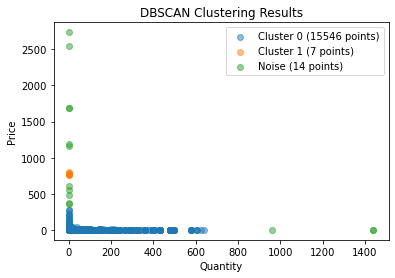

In [68]:
for cluster_label in df['Cluster'].unique():
    if cluster_label == -1:
        cluster_data = df[df['Cluster'] == cluster_label]
        plt.scatter(cluster_data['Quantity'], cluster_data['Price'], label=f'Noise ({len(cluster_data)} points)', alpha=0.5)
    else:
        cluster_data = df[df['Cluster'] == cluster_label]
        plt.scatter(cluster_data['Quantity'], cluster_data['Price'], label=f'Cluster {cluster_label} ({len(cluster_data)} points)', alpha=0.5)

plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('DBSCAN Clustering Results')
plt.legend()
plt.show()

Cluster 0 is the largest cluster, containing 15,546 data points. This cluster represents a significant portion of my dataset. In a retail context, this could be most common customer group. These customers exhibit similar purchasing behavior or spending patterns. They might be considered them as average customers.

Cluster 1 is a smaller cluster with only 7 data points. This indicates a distinct group of customers who behave differently from the majority. In a retail setting, this cluster might represent a unique set of customers with specific preferences. YIn business part, my customers may want to pay special attention to this group for targeted marketing or product recommendations.

Noise points are data points that do not belong to any of the defined clusters. In DBSCAN, they are typically considered as outliers or data points that do not fit well into any cluster. These 14 data points may represent highly unusual or irregular behavior and might not be well-represented by the clustering algorithm.

# 

## Market Basket Analysis

For the MBA part, I will use the "Description" column as it's essential for understanding what each item is and "Invoice" feature, to group items by transaction, which is necessary for market basket analysis. This approach should give me frequent itemsets, which represent products that are often bought together.

### Apriori

In [69]:
transaction_data = df.groupby('Invoice')['Description'].apply(list).reset_index()

In [70]:
basket = transaction_data['Description'].str.join('|').str.get_dummies().set_index(transaction_data['Invoice'])

In [74]:
basket

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,CHERRY BLOSSOM DECORATIVE FLASK,DOLLY GIRL BEAKER,HOME SWEET HOME BLACKBOARD,IVORY PAPER CUP CAKE CASES,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,PAINT YOUR OWN CANVAS SET,RED SPOT GIFT BAG LARGE,...,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489520,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
489546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
581006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
basket = basket.astype(bool)

In [76]:
min_support = 0.01

frequent_itemsets = apriori(basket, min_support=min_support, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.022928,(10 COLOUR SPACEBOY PEN)
1,0.022928,(12 EGG HOUSE PAINTED WOOD)
2,0.015873,(12 PENCIL SMALL TUBE WOODLAND)
3,0.012346,(12 PENCILS TALL TUBE POSY)
4,0.010582,(12 PENCILS TALL TUBE RED SPOTTY)
...,...,...
5270,0.012346,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU..."
5271,0.010582,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU..."
5272,0.010582,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU..."
5273,0.010582,"(REGENCY CAKESTAND 3 TIER, REGENCY TEAPOT ROSE..."


In [77]:
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets_sorted

,support,itemsets
106,0.317460,(CARRIAGE)
568,0.225750,(REGENCY CAKESTAND 3 TIER)
27,0.128748,(60 TEATIME FAIRY CAKE CASES)
789,0.128748,(WHITE HANGING HEART T-LIGHT HOLDER)
780,0.111111,(VINTAGE SNAP CARDS)
...,...,...
2808,0.010582,"(RAIN HAT WITH RED SPOTS, LUNCH BAG RED SPOTTY..."
2810,0.010582,"(MINT KITCHEN SCALES, REGENCY CAKESTAND 3 TIER..."
2811,0.010582,"(MINT KITCHEN SCALES, REGENCY CAKESTAND 3 TIER..."
2812,0.010582,"(PACK OF 12 TRADITIONAL CRAYONS, PACK OF 12 CO..."


In [78]:
min_confidence = 0.7

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(3 STRIPEY MICE FELTCRAFT),(CARRIAGE),0.017637,0.317460,0.012346,0.700000,2.205000,0.006747,2.275132,0.556296
1,(36 PENCILS TUBE RED SPOTTY),(60 TEATIME FAIRY CAKE CASES),0.024691,0.128748,0.017637,0.714286,5.547945,0.014458,3.049383,0.840506
2,(LIGHT PINK CHERRY LIGHTS),(60 TEATIME FAIRY CAKE CASES),0.015873,0.128748,0.012346,0.777778,6.041096,0.010302,3.920635,0.847926
3,(PEARL CRYSTAL PUMPKIN T-LIGHT HLDR),(60 TEATIME FAIRY CAKE CASES),0.012346,0.128748,0.010582,0.857143,6.657534,0.008993,6.098765,0.860417
4,(RAIN HAT WITH RED SPOTS),(60 TEATIME FAIRY CAKE CASES),0.015873,0.128748,0.012346,0.777778,6.041096,0.010302,3.920635,0.847926
...,...,...,...,...,...,...,...,...,...,...
68859,"(SET/5 RED SPOTTY LID GLASS BOWLS, I CAN ONLY ...","(RAIN HAT WITH RED SPOTS, HOME SWEET HOME MUG,...",0.012346,0.010582,0.010582,0.857143,81.000000,0.010451,6.925926,1.000000
68860,"(PACK OF 72 RETRO SPOT CAKE CASES, I CAN ONLY ...","(RAIN HAT WITH RED SPOTS, HOME SWEET HOME MUG,...",0.012346,0.010582,0.010582,0.857143,81.000000,0.010451,6.925926,1.000000
68861,"(72 SWEETHEART FAIRY CAKE CASES, I CAN ONLY PL...","(RAIN HAT WITH RED SPOTS, HOME SWEET HOME MUG,...",0.012346,0.010582,0.010582,0.857143,81.000000,0.010451,6.925926,1.000000
68862,"(VICTORIAN SEWING BOX MEDIUM, I CAN ONLY PLEAS...","(RAIN HAT WITH RED SPOTS, HOME SWEET HOME MUG,...",0.010582,0.010582,0.010582,1.000000,94.500000,0.010470,inf,1.000000


If we want to improve selling of some product, we should move it closer to till or to products with higher lift value. For example, in this case, if we want to improve sales of RAIN HAT WITH RED SPOTS, we should place it close to SET/5 RED SPOTTY LID as lift value is 81.000 which suggests that presence of SET/5 LID in a basket will 81 times more likely to lead to purchase of RAIN HAT as well. 

In [79]:
rules_sorted = rules.sort_values(by='confidence', ascending=False)
rules_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
34432,"(RAIN HAT WITH RED SPOTS, 60 TEATIME FAIRY CAK...","(PACK OF 72 RETRO SPOT CAKE CASES, VICTORIAN S...",0.010582,0.019400,0.010582,1.0,51.545455,0.010377,inf,0.991087
40837,"(GIN AND TONIC MUG, VICTORIAN SEWING BOX MEDIUM)","(HOME SWEET HOME MUG, PACK OF 72 RETRO SPOT CA...",0.010582,0.012346,0.010582,1.0,81.000000,0.010451,inf,0.998217
40812,"(GIN AND TONIC MUG, HOME SWEET HOME MUG, VICTO...","(PACK OF 72 RETRO SPOT CAKE CASES, 72 SWEETHEA...",0.010582,0.012346,0.010582,1.0,81.000000,0.010451,inf,0.998217
40819,"(VICTORIAN SEWING BOX MEDIUM, SET/5 RED SPOTTY...","(72 SWEETHEART FAIRY CAKE CASES, GIN AND TONIC...",0.010582,0.012346,0.010582,1.0,81.000000,0.010451,inf,0.998217
40820,"(GIN AND TONIC MUG, SET/5 RED SPOTTY LID GLASS...","(72 SWEETHEART FAIRY CAKE CASES, HOME SWEET HO...",0.010582,0.012346,0.010582,1.0,81.000000,0.010451,inf,0.998217
...,...,...,...,...,...,...,...,...,...,...
5093,(REGENCY TEA PLATE PINK),"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...",0.035273,0.028219,0.024691,0.7,24.806250,0.023696,3.239271,0.994777
62221,"(REGENCY CAKESTAND 3 TIER, REGENCY TEAPOT ROSE...","(REGENCY TEA PLATE PINK, REGENCY MILK JUG PINK )",0.017637,0.026455,0.012346,0.7,26.460000,0.011879,3.245150,0.979482
62230,"(REGENCY CAKESTAND 3 TIER, REGENCY SUGAR BOWL ...","(REGENCY MILK JUG PINK , REGENCY TEAPOT ROSES )",0.017637,0.024691,0.012346,0.7,28.350000,0.011910,3.251029,0.982047
62231,"(REGENCY CAKESTAND 3 TIER, REGENCY SUGAR BOWL ...","(REGENCY TEAPOT ROSES , ROSES REGENCY TEACUP A...",0.017637,0.028219,0.012346,0.7,24.806250,0.011848,3.239271,0.976917


In [80]:
top_20_products = frequent_itemsets_sorted.head(20)

top_20_products['Support Percentage'] = top_20_products['support'] * 100

top_20_products = top_20_products[['itemsets', 'Support Percentage']]

top_20_products = top_20_products.rename(columns={'itemsets': 'Product', 'Support Percentage': 'Support (%)'})

top_20_products

,Product,Support (%)
106,(CARRIAGE),31.746032
568,(REGENCY CAKESTAND 3 TIER),22.574956
27,(60 TEATIME FAIRY CAKE CASES),12.874780
789,(WHITE HANGING HEART T-LIGHT HOLDER),12.874780
780,(VINTAGE SNAP CARDS),11.111111
609,(ROSES REGENCY TEACUP AND SAUCER ),10.229277
54,(BAKING SET 9 PIECE RETROSPOT ),10.052910
445,(PACK OF 60 PINK PAISLEY CAKE CASES),9.171076
298,(GREEN REGENCY TEACUP AND SAUCER),8.112875
171,(COOK WITH WINE METAL SIGN ),7.936508


If we check support, we will see that product that has been added to basket most was Carriage – it has been added to 31.74% baskets. 

In [81]:
confidence_100 = rules_sorted[rules_sorted['confidence'] == 1.0]

confidence_100['Support'] = confidence_100.apply(lambda row: frequent_itemsets_sorted[frequent_itemsets_sorted['itemsets'] == row['antecedents']].iloc[0]['support'], axis=1)

confidence_100 = confidence_100[['antecedents', 'consequents', 'Support', 'confidence']]

confidence_100 = confidence_100.rename(columns={'antecedents': 'Antecedents', 'consequents': 'Consequents', 'Support': 'Support', 'confidence': 'Confidence'})

confidence_100

,Antecedents,Consequents,Support,Confidence
34432,"(RAIN HAT WITH RED SPOTS, 60 TEATIME FAIRY CAK...","(PACK OF 72 RETRO SPOT CAKE CASES, VICTORIAN S...",0.010582,1.0
40837,"(GIN AND TONIC MUG, VICTORIAN SEWING BOX MEDIUM)","(HOME SWEET HOME MUG, PACK OF 72 RETRO SPOT CA...",0.010582,1.0
40812,"(GIN AND TONIC MUG, HOME SWEET HOME MUG, VICTO...","(PACK OF 72 RETRO SPOT CAKE CASES, 72 SWEETHEA...",0.010582,1.0
40819,"(VICTORIAN SEWING BOX MEDIUM, SET/5 RED SPOTTY...","(72 SWEETHEART FAIRY CAKE CASES, GIN AND TONIC...",0.010582,1.0
40820,"(GIN AND TONIC MUG, SET/5 RED SPOTTY LID GLASS...","(72 SWEETHEART FAIRY CAKE CASES, HOME SWEET HO...",0.010582,1.0
...,...,...,...,...
24414,"(HOME SWEET HOME MUG, RETRO RED SPOTTY WASHING...",(PACK OF 72 RETRO SPOT CAKE CASES),0.010582,1.0
23848,"(RAIN HAT WITH RED SPOTS, SET/5 RED SPOTTY LID...","(VICTORIAN SEWING BOX MEDIUM, 72 SWEETHEART FA...",0.010582,1.0
3653,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...",(ROSES REGENCY TEACUP AND SAUCER ),0.024691,1.0
11082,"(REGENCY TEA PLATE PINK, SET OF 60 PANTRY DESI...","(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...",0.010582,1.0


There are 40580 rows of products that have 1.0 as confidence, which means that, for example, when RAIN HAT WITH RED SPOTS is bought, there is 100% chance that VICTORIAN SEWING BOX MEDIUM will be bought as well. In terms of business part, that would mean that we should place these products close to each other in shop or sell them as bundle. 

### FP - Growth

In [82]:
basket = (df.groupby(['Invoice', 'Description'])['Description']
          .count().unstack().reset_index()
          .fillna(0)
          .set_index('Invoice'))

In [83]:
basket[basket > 0] = 1

In [84]:
frequent_itemsets = fpgrowth(basket, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.059965,(HOT WATER BOTTLE TEA AND SYMPATHY)
1,0.035273,(SET/3 RED GINGHAM ROSE STORAGE BOX)
2,0.035273,(DOOR MAT NEW ENGLAND)
3,0.033510,(PAPER CHAIN KIT 50'S CHRISTMAS )
4,0.033510,(RIBBON REEL STRIPES DESIGN )
...,...,...
5270,0.010582,"(SET OF 6 SNACK LOAF BAKING CASES, GREEN REGEN..."
5271,0.010582,"(SET OF 6 SNACK LOAF BAKING CASES, GREEN REGEN..."
5272,0.010582,"(SET OF 6 SNACK LOAF BAKING CASES, ROSES REGEN..."
5273,0.010582,"(SET OF 6 SNACK LOAF BAKING CASES, GREEN REGEN..."


In [85]:
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)

frequent_itemsets_sorted

,support,itemsets
53,0.317460,(CARRIAGE)
389,0.225750,(REGENCY CAKESTAND 3 TIER)
73,0.128748,(WHITE HANGING HEART T-LIGHT HOLDER)
42,0.128748,(60 TEATIME FAIRY CAKE CASES)
113,0.111111,(VINTAGE SNAP CARDS)
...,...,...
3382,0.010582,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU..."
3383,0.010582,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC..."
3384,0.010582,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU..."
2015,0.010582,"(HOME SWEET HOME MUG, LUNCH BAG RED SPOTTY, 60..."


In [86]:
association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(60 TEATIME FAIRY CAKE CASES, HOT WATER BOTTLE...",(CHOCOLATE HOT WATER BOTTLE),0.019400,0.072310,0.015873,0.818182,11.314856,0.014470,5.102293,0.929656
1,"(CHOCOLATE HOT WATER BOTTLE, WHITE HANGING HEA...",(HOT WATER BOTTLE TEA AND SYMPATHY),0.014109,0.059965,0.012346,0.875000,14.591912,0.011500,7.520282,0.944799
2,"(HOT WATER BOTTLE TEA AND SYMPATHY, WHITE HANG...",(CHOCOLATE HOT WATER BOTTLE),0.015873,0.072310,0.012346,0.777778,10.756098,0.011198,4.174603,0.921659
3,"(60 TEATIME FAIRY CAKE CASES, CHOCOLATE HOT WA...",(HOT WATER BOTTLE TEA AND SYMPATHY),0.012346,0.059965,0.010582,0.857143,14.294118,0.009842,6.580247,0.941667
4,"(60 TEATIME FAIRY CAKE CASES, HOT WATER BOTTLE...",(CHOCOLATE HOT WATER BOTTLE),0.010582,0.072310,0.010582,1.000000,13.829268,0.009817,inf,0.937611
...,...,...,...,...,...,...,...,...,...,...
68859,"(SET OF 6 SNACK LOAF BAKING CASES, ROSES REGEN...",(GREEN REGENCY TEACUP AND SAUCER),0.010582,0.081129,0.010582,1.000000,12.326087,0.009724,inf,0.928699
68860,"(SET OF 6 SNACK LOAF BAKING CASES, GREEN REGEN...","(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.010582,0.063492,0.010582,1.000000,15.750000,0.009910,inf,0.946524
68861,"(SET OF 6 SNACK LOAF BAKING CASES, ROSES REGEN...","(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.010582,0.063492,0.010582,1.000000,15.750000,0.009910,inf,0.946524
68862,"(SET OF 6 SNACK LOAF BAKING CASES, PINK REGENC...","(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.010582,0.070547,0.010582,1.000000,14.175000,0.009835,inf,0.939394


In [87]:
association_rules_sorted_by_confidence = association_rules.sort_values(by='confidence', ascending=False)

association_rules_sorted_by_confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
34432,"(HOME SWEET HOME MUG, 60 TEATIME FAIRY CAKE CA...","(RAIN HAT WITH RED SPOTS, PACK OF 72 RETRO SPO...",0.010582,0.010582,0.010582,1.0,94.500000,0.010470,inf,1.000000
30993,"(RAIN HAT WITH RED SPOTS, HOME SWEET HOME MUG,...",(SET/5 RED SPOTTY LID GLASS BOWLS),0.010582,0.051146,0.010582,1.0,19.551724,0.010041,inf,0.959002
50107,"(REGENCY MILK JUG PINK , REGENCY TEA PLATE ROS...",(ROSES REGENCY TEACUP AND SAUCER ),0.015873,0.102293,0.015873,1.0,9.775862,0.014249,inf,0.912186
30985,"(LUNCH BAG RED SPOTTY, I CAN ONLY PLEASE ONE P...","(RAIN HAT WITH RED SPOTS, 60 TEATIME FAIRY CAK...",0.010582,0.010582,0.010582,1.0,94.500000,0.010470,inf,1.000000
30986,"(60 TEATIME FAIRY CAKE CASES, I CAN ONLY PLEAS...","(RAIN HAT WITH RED SPOTS, LUNCH BAG RED SPOTTY...",0.010582,0.010582,0.010582,1.0,94.500000,0.010470,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
53895,"(REGENCY SUGAR BOWL GREEN, REGENCY TEA PLATE R...","(REGENCY TEAPOT ROSES , GREEN REGENCY TEACUP A...",0.017637,0.024691,0.012346,0.7,28.350000,0.011910,3.251029,0.982047
55720,"(REGENCY TEA PLATE PINK, REGENCY TEA PLATE ROS...","(REGENCY CAKESTAND 3 TIER, REGENCY TEAPOT ROSE...",0.017637,0.019400,0.012346,0.7,36.081818,0.012004,3.268665,0.989741
56636,"(REGENCY CAKESTAND 3 TIER, REGENCY TEAPOT ROSE...","(REGENCY SUGAR BOWL GREEN, REGENCY TEA PLATE P...",0.017637,0.017637,0.012346,0.7,39.690000,0.012035,3.274544,0.992306
53899,"(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...","(REGENCY TEAPOT ROSES , REGENCY TEA PLATE GREE...",0.017637,0.015873,0.012346,0.7,44.100000,0.012066,3.280423,0.994870


# 

## Additional analysis

I will provide additional analysis of products sold and transactions

### Top 10 sold products

In [88]:
top_products = df.groupby('Description')['Quantity'].sum()

top_products = top_products.sort_values(ascending=False)

top_10_products = top_products.head(10)

top_10_products

Description
60 TEATIME FAIRY CAKE CASES           5364
72 SWEETHEART FAIRY CAKE CASES        4032
PACK OF 72 RETRO SPOT CAKE CASES      3912
PACK OF 60 PINK PAISLEY CAKE CASES    3732
PACK OF 60 DINOSAUR CAKE CASES        3264
COOK WITH WINE METAL SIGN             3074
ASSORTED INCENSE PACK                 2880
YOU'RE CONFUSING ME METAL SIGN        2832
HANGING JAM JAR T-LIGHT HOLDER        2520
SMALL POPCORN HOLDER                  2400
Name: Quantity, dtype: int64

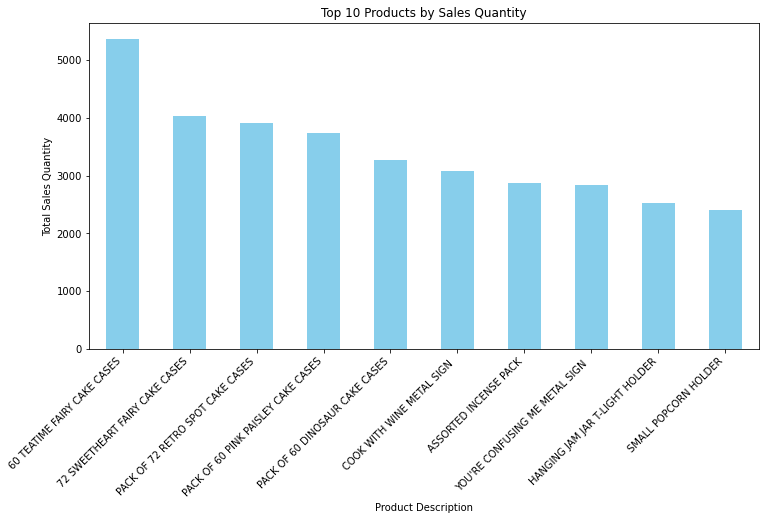

In [89]:
plt.figure(figsize=(12, 6))
top_10_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Sales Quantity')
plt.xlabel('Product Description')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45, ha='right')
plt.show()

### Top performing month in the year

In [90]:
df['Month'] = df['InvoiceDate'].dt.month

monthly_sales = df.groupby('Month')['Quantity'].sum()

monthly_sales = monthly_sales.sort_values(ascending=False)

top_5_months = monthly_sales.head(5)

month_names = [pd.Timestamp(f'2023-{month}-01').strftime('%B') for month in top_5_months.index]

best_selling_month = pd.DataFrame({'Month': month_names, 'Total Sales Quantity': top_5_months.values})

best_selling_month

,Month,Total Sales Quantity
0,September,41848
1,January,39601
2,July,34953
3,October,33202
4,November,29547


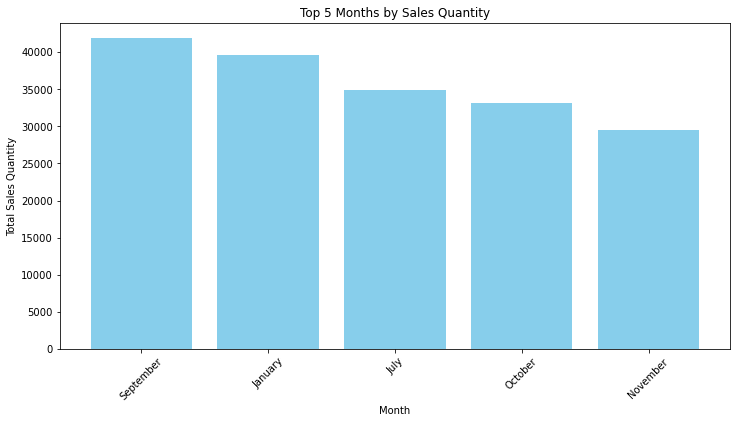

In [91]:
plt.figure(figsize=(12, 6))
plt.bar(month_names, top_5_months, color='skyblue')
plt.title('Top 5 Months by Sales Quantity')
plt.xlabel('Month')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45)
plt.show()

### Prices of most bought products compared to price average of all products

In [92]:
average_price = df['Price'].mean()

In [93]:
price_quantity = df.groupby('Price')['Quantity'].sum()

price_quantity = price_quantity.sort_values(ascending=False)

In [94]:
top_prices = price_quantity.head(10)

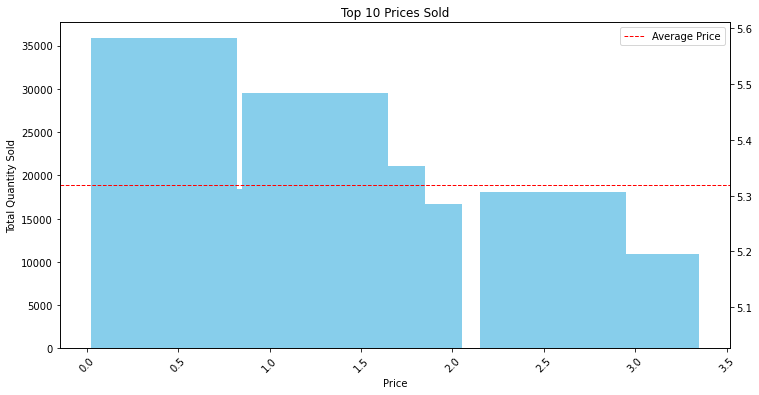

In [95]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(top_prices.index, top_prices.values, color='skyblue')
ax1.set_title('Top 10 Prices Sold')
ax1.set_xlabel('Price')
ax1.set_ylabel('Total Quantity Sold')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.axhline(y=average_price, color='red', linestyle='--', linewidth=1, label='Average Price')
ax2.legend()

plt.show()